In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', '{:.2f} '.format)
df = pd.read_csv("sales_data.csv")
df.head

<bound method NDFrame.head of     OrderID         CustomerName  Category  Amount  Rating   OrderDate
0         1          Justin Hahn     Books 353.32        4  18-01-2025
1         2     Joshua Velasquez     Books 469.74        2  02-09-2024
2         3           Karen Tran  Clothing 671.81        4  13-07-2024
3         4       Andrew Roberts      Home 386.22        2  07-06-2024
4         5        Patricia Boyd      Toys 722.20        1  13-12-2024
..      ...                  ...       ...     ...     ...         ...
95       96        Rachel Hughes      Home 391.79        1  26-02-2025
96       97          Susan Brown     Books 679.11        3  12-10-2024
97       98  Miss Ashley Aguilar      Home 705.52        1  17-06-2024
98       99      Jessica Johnson     Books 770.00        3  04-07-2024
99      100         James Brewer     Books 711.10        1  25-04-2024

[100 rows x 6 columns]>

In [2]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       100 non-null    int64  
 1   CustomerName  100 non-null    object 
 2   Category      100 non-null    object 
 3   Amount        100 non-null    float64
 4   Rating        100 non-null    int64  
 5   OrderDate     100 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB


OrderID         0
CustomerName    0
Category        0
Amount          0
Rating          0
OrderDate       0
dtype: int64

In [4]:
print(df.columns)
df.columns = df.columns.str.strip()
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors = 'coerce')
df['Month'] = df['OrderDate'].dt.to_period('M')
df['Day'] = df['OrderDate'].dt.date

Index(['OrderID', 'CustomerName', 'Category', 'Amount', 'Rating', 'OrderDate',
       'Month', 'Day'],
      dtype='object')


In [5]:
###1.total revenue
df['Amount'].sum()

57215.45

In [6]:
### category with highest revenue
df.groupby('Category')['Amount'].sum().sort_values(ascending = False)

Category
Books         14178.43 
Home          11975.88 
Toys          10627.08 
Clothing      10549.91 
Electronics    9884.15 
Name: Amount, dtype: float64

In [7]:
### 3.Average rating per category
df.groupby('Category')['Rating'].mean().sort_values(ascending = False)

Category
Clothing      3.78 
Electronics   3.19 
Books         2.69 
Toys          2.50 
Home          2.32 
Name: Rating, dtype: float64

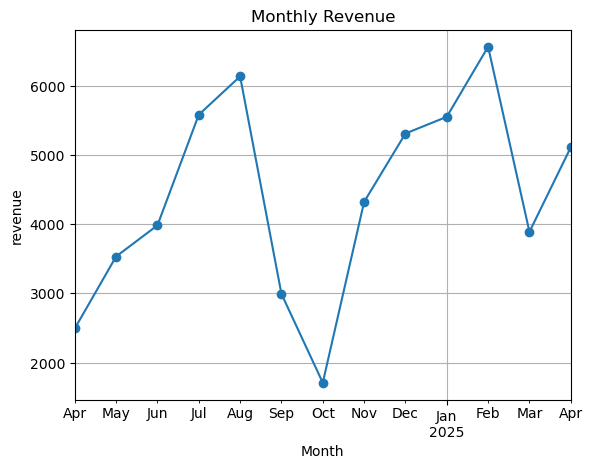

In [8]:
### 4.monthly revenue trend
monthly_revenue = df.groupby('Month')['Amount'].sum()
monthly_revenue.plot(kind='line',title='Monthly Revenue',marker='o')
plt.ylabel("revenue")
plt.grid()
plt.show()


In [9]:
### 5.top 5 customers by total spend
df.groupby('CustomerName')['Amount'].sum().sort_values(ascending = False).head(5)

CustomerName
Michael Johnson     996.34 
Sergio Robinson     992.05 
Crystal Zimmerman   981.09 
Vanessa Boyd        979.21 
Nicole Henry        977.37 
Name: Amount, dtype: float64

In [10]:
##3 6.count of perfect 5-star orders
(df['Rating'] == 5).sum()

15

In [11]:
### 7.Avg order amount per category
df.groupby('Category')['Amount'].mean()

Category
Books         545.32 
Clothing      586.11 
Electronics   617.76 
Home          544.36 
Toys          590.39 
Name: Amount, dtype: float64

In [12]:
### 8.Number of orders per category
df['Category'].value_counts()

Category
Books          26
Home           22
Clothing       18
Toys           18
Electronics    16
Name: count, dtype: int64

In [13]:
### 9.Day with highest total sales
df.groupby('Day')['Amount'].sum().sort_values(ascending=False).head(1)

Day
2025-04-12   1826.84 
Name: Amount, dtype: float64

In [14]:
### 10.Unique customers
df['CustomerName'].nunique()

100

In [15]:
### 11.most frequent rating
df['Rating'].mode()[0]

1

In [17]:
### 12.revnue per rating score
df.groupby('Rating')['Amount'].sum()

Rating
1   14985.04 
2   10436.78 
3    8722.54 
4   14339.71 
5    8731.38 
Name: Amount, dtype: float64

In [20]:

print (df.columns)


Index(['OrderID', 'CustomerName', 'Category', 'Amount', 'Rating', 'OrderDate',
       'Month', 'Day'],
      dtype='object')


In [22]:
### 13.customer who gave most 5-star ratings
df[df['Rating'] == 5]['CustomerName'].value_counts().head(1)

CustomerName
Regina Bates    1
Name: count, dtype: int64

### 14.avg order per order by month
df.groupby('Month')['Amount'].mean()

In [23]:
df.groupby('Month')['Amount'].mean()

Month
2024-04   498.73 
2024-05   589.17 
2024-06   569.41 
2024-07   620.65 
2024-08   614.07 
2024-09   427.78 
2024-10   341.83 
2024-11   617.88 
2024-12   590.47 
2025-01   555.58 
2025-02   547.48 
2025-03   555.94 
2025-04   852.39 
Freq: M, Name: Amount, dtype: float64

In [25]:
### 15.revenue from top 10% customers
top_customers = df.groupby('CustomerName')['Amount'].sum()
threshold = top_customers.quantile(0.90)
top_10_percent_revenue = top_customers[top_customers >= threshold].sum()
total_revenue = df['Amount'].sum()
(top_10_percent_revenue / total_revenue) * 100

16.752066094035793

In [26]:
### 16.Customers with more then 3 orders
df['CustomerName'].value_counts()[df['CustomerName'].value_counts() > 3]

Series([], Name: count, dtype: int64)

In [27]:
df['CustomerName'].value_counts()

CustomerName
Justin Hahn       1
Terri Pearson     1
Mark Bishop       1
Sally Smith       1
Charles Walker    1
                 ..
John Ferguson     1
Austin Perry      1
Jackie Douglas    1
Tina Webb         1
James Brewer      1
Name: count, Length: 100, dtype: int64

In [28]:
### 17.average rating across all orders
df['Rating'].mean()

2.85

In [29]:
### 18.category with highest avg order value
df.groupby('Category')['Amount'].mean().sort_values(ascending = False).head()

Category
Electronics   617.76 
Toys          590.39 
Clothing      586.11 
Books         545.32 
Home          544.36 
Name: Amount, dtype: float64

In [31]:
### 19.Revenue % by category
category_revenue = df.groupby('Category')['Amount'].sum()
(category_revenue / category_revenue.sum()) *100

Category
Books         24.78 
Clothing      18.44 
Electronics   17.28 
Home          20.93 
Toys          18.57 
Name: Amount, dtype: float64

In [32]:
### 20.category with most 5-star ratings
df[df['Rating'] == 5].groupby('Category').size().sort_values(ascending=False)

Category
Clothing       6
Electronics    4
Home           3
Books          1
Toys           1
dtype: int64

In [33]:
### 21.month with highest avg rating
df.groupby('Month')['Rating'].mean().sort_values(ascending=False).head(1)

Month
2025-04   3.83 
Freq: M, Name: Rating, dtype: float64

In [34]:
### 22.customer with highest average order value
df.groupby('CustomerName')['Amount'].mean().sort_values(ascending=False).head(1)

CustomerName
Michael Johnson   996.34 
Name: Amount, dtype: float64

In [37]:
###23.Month-over-month revenue growth
monthly = df.groupby('Month')['Amount'].sum()
monthly.pct_change().fillna(0) * 100

Month
2024-04     0.00 
2024-05    41.76 
2024-06    12.75 
2024-07    40.14 
2024-08     9.93 
2024-09   -51.24 
2024-10   -42.92 
2024-11   153.06 
2024-12    22.87 
2025-01     4.54 
2025-02    18.25 
2025-03   -40.77 
2025-04    31.42 
Freq: M, Name: Amount, dtype: float64

In [39]:
### 24.customer who gave both 1-star and 5-star ratings
one_star = set(df[df['Rating'] == 1]['CustomerName'])
five_star = set(df[df['Rating'] == 5]['CustomerName'])
one_star & five_star

set()

In [41]:
### 25.Avg order value for 5-star ratings
df[df['Rating'] == 5]['Amount'].mean()

582.092

In [47]:
### 26.customers who always rated >= 4
min_ratings = df.groupby('CustomerName')['Rating'].min()
customers_always_rated_4_or_above = min_ratings[min_ratings >= 4]
print(customers_always_rated_4_or_above)

CustomerName
Amy Harrington           4
Austin Perry             4
Colleen Gordon           4
Crystal Watson           5
Dawn Taylor              5
Dr. Christopher Woods    4
Fred Jennings            5
Hannah Johnson           5
Heather Robinson         4
Jackie Douglas           4
Jennifer Gates           4
Jillian Shaw             4
John Ferguson            4
Joseph Sampson           4
Juan Patterson           5
Julie Bailey             5
Justin Hahn              4
Karen Tran               4
Lisa Kelly               5
Lisa Smith               5
Mark Bishop              5
Megan Garcia             4
Melissa Rose             5
Mindy Williams           4
Nicole Wright            4
Rachel Pham              4
Regina Bates             5
Ryan Mckinney            4
Sally Smith              4
Sara Parker              5
Sergio Robinson          4
Shannon Lopez            4
Tanya Mcbride            4
Taylor Flores            4
Taylor Valencia          5
Teresa Baker             5
Timothy Woodwar

In [48]:
### 27.std.deviation of amount by category
df.groupby('Category')['Amount'].std()

Category
Books         251.45 
Clothing      217.95 
Electronics   280.08 
Home          271.63 
Toys          179.93 
Name: Amount, dtype: float64

In [49]:
### 28.month with highest revenue growth
growth = monthly.pct_change().fillna(0)
growth.sort_values(ascending=False).head(1)

Month
2024-11   1.53 
Freq: M, Name: Amount, dtype: float64

In [50]:
### 29.category with lowest avg rating
df.groupby('Category')['Rating'].mean().sort_values().head(1)

Category
Home   2.32 
Name: Rating, dtype: float64

In [53]:
### 30.High value but poorly rated orders
df[(df['Amount'] >df['Amount'].quantile(0.9)) & (df['Rating'] <= 2)]

,OrderID,CustomerName,Category,Amount,Rating,OrderDate,Month,Day
9,10,Nicole Henry,Home,977.37,1,2024-12-25,2024-12,2024-12-25
21,22,Jared Smith,Clothing,923.00,1,2024-07-09,2024-07,2024-07-09
57,58,Vanessa Boyd,Electronics,979.21,2,2024-06-08,2024-06,2024-06-08
71,72,Charles Walker,Home,972.82,1,2024-08-14,2024-08,2024-08-14
91,92,Crystal Zimmerman,Home,981.09,2,2024-08-19,2024-08,2024-08-19
